In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import shutil
import random
import os
import json
import numpy as np

C:\Users\ehtes\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
with open("params.json", 'r') as params_file:
    params = json.load(params_file)

In [3]:
path = params["dir"]["test_dataset"]
destination_folder = "Test Data"
lst_dir = os.listdir(path)

In [4]:
dc = {}

In [5]:
test_count = 0
for sub_folder in lst_dir:
    s_folder_join = os.path.join(path, sub_folder)
    sub_folder_lst = os.listdir(s_folder_join)
    img = random.choice(sub_folder_lst)
    img_dir = os.path.join(s_folder_join, img)
    shutil.copy(img_dir, destination_folder)
    print(f"{img} is Completely Copied from --> {img_dir}")
    dc[img] = img_dir
    test_count += 1
    if test_count == 5:
        break

Image_7.jpg is Completely Copied from --> DataSet/test\apple\Image_7.jpg
Image_9.jpg is Completely Copied from --> DataSet/test\banana\Image_9.jpg
Image_5.jpg is Completely Copied from --> DataSet/test\beetroot\Image_5.jpg
Image_4.jpg is Completely Copied from --> DataSet/test\bell pepper\Image_4.jpg
Image_2.jpg is Completely Copied from --> DataSet/test\cabbage\Image_2.jpg


In [6]:
dc

{'Image_7.jpg': 'DataSet/test\\apple\\Image_7.jpg',
 'Image_9.jpg': 'DataSet/test\\banana\\Image_9.jpg',
 'Image_5.jpg': 'DataSet/test\\beetroot\\Image_5.jpg',
 'Image_4.jpg': 'DataSet/test\\bell pepper\\Image_4.jpg',
 'Image_2.jpg': 'DataSet/test\\cabbage\\Image_2.jpg'}

In [7]:
model = tf.keras.models.load_model("model/food_recognition.h5")

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [9]:
test_file = os.listdir("Test Data")
img_height = params["img_params"]["img_height"]
img_width = params["img_params"]["img_width"]

In [10]:
class_name = os.listdir("DataSet/test")
class_name

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [11]:
len(dc)

5

1/1 [==============================] - 0s 142ms/step


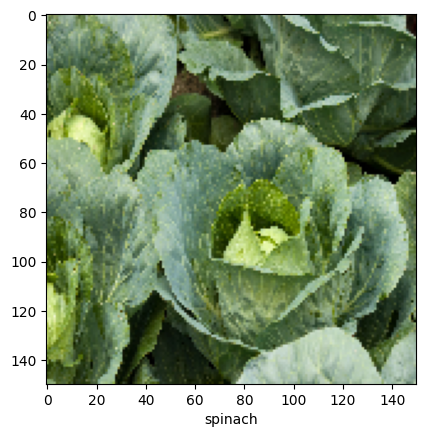

DataSet/test\cabbage\Image_2.jpg
This image most likely belongs to spinach with a 71.71 percent confidence.
1/1 [==============================] - 0s 19ms/step


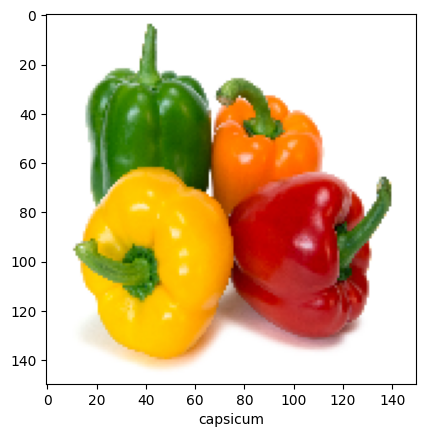

DataSet/test\bell pepper\Image_4.jpg
This image most likely belongs to capsicum with a 75.80 percent confidence.
1/1 [==============================] - 0s 34ms/step


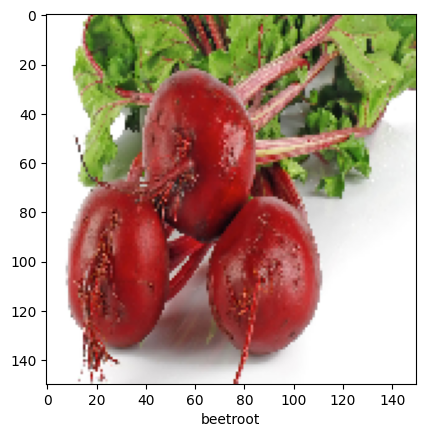

DataSet/test\beetroot\Image_5.jpg
This image most likely belongs to beetroot with a 66.69 percent confidence.
1/1 [==============================] - 0s 40ms/step


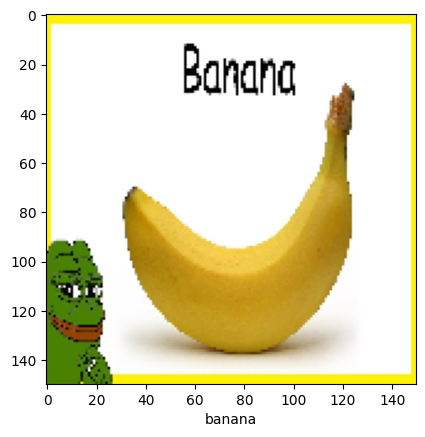

KeyError: 'Image_6.JPG'

In [12]:
for img1 in test_file:
    img_dir = os.path.join(destination_folder, img1)
    img = tf.keras.utils.load_img(
        img_dir, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    plt.imshow(img)
    plt.xlabel(class_name[np.argmax(score)])
    plt.show()
    print(dc[img1])
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_name[np.argmax(score)], 100 * np.max(score))
    )
